In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import os
from glob import glob
from os.path import join as pathjoin
import h5py
import time

import imp
import donglab_workflows as dw
imp.reload(dw)

<module 'donglab_workflows' from '/home/dtward/Documents/UCLA/dong/donglab_workflows/donglab_workflows.py'>

# downsample lightsheet

Note the metadata Nick sent says

Obj	V_Res	µm/pix	Z step (µm)	Scanning	

LCT 4x	1600	1.820	4	Fast	




In [2]:
# filename
input_filename = '/home/dtward/bmaproot/panfs/dong/Scans/3D/sw210111-01/Raw_LS_4X/sw210111-01-4X_ZStep4um_75p4ms_Stitched_Ex_488_Em_0.ims'
#input_filename = '/home/dtward/bmaproot/panfs/dong/Scans/3D/sw210111-01/Raw_LS_4X/sw210111-01-4X_ZStep4um_75p4ms_Stitched_Ex_561_Em_1.ims'
output_filename = None
dI = np.array([4.0,1.820,1.820]) # we need to input the voxel size, slice thickness first, in microns
res = 50.0
dataset_string = 'DataSet/ResolutionLevel 0/TimePoint 0/Channel 0/Data'
# we need an output directory for intermediate results (each slice)
outdir = 'donglab_lightsheet_v00'


In [3]:
if output_filename is None:
    output_filename = os.path.splitext(os.path.split(input_filename)[-1])[0] + '_down.npz'
print(f'Input filename is {input_filename}')
print(f'Output filename is {output_filename}')
print(f'Resolution is {dI}')
print(f'Desired resolution is {res}')
print(f'Dataset string is {dataset_string}')
if not os.path.exists(outdir):
    os.mkdir(outdir)

Input filename is /home/dtward/bmaproot/panfs/dong/Scans/3D/sw210111-01/Raw_LS_4X/sw210111-01-4X_ZStep4um_75p4ms_Stitched_Ex_488_Em_0.ims
Output filename is sw210111-01-4X_ZStep4um_75p4ms_Stitched_Ex_488_Em_0_down.npz
Resolution is [4.   1.82 1.82]
Desired resolution is 50.0
Dataset string is DataSet/ResolutionLevel 0/TimePoint 0/Channel 0/Data


In [4]:
# I want 50 micron
down = np.floor(res/dI).astype(int)
print(f'Downsampling factors are {down}')
print(f'Downsampled res {dI*down}')

Downsampling factors are [12 27 27]
Downsampled res [48.   49.14 49.14]


In [5]:
# load the data
f = h5py.File(input_filename,'r')

In [6]:
data = f[dataset_string]

In [7]:
print(f'Dataset shape {data.shape}')

Dataset shape (2112, 10240, 7424)


In [8]:
nI = np.array(data.shape)
xI = [np.arange(n)*d - (n-1)/2.0*d for n,d in zip(nI,dI)]

In [9]:
xId = [dw.downsample(x,[d]) for x,d in zip(xI,down)]
dId = [x[1]-x[0] for x in xId]

<IPython.core.display.Javascript object>


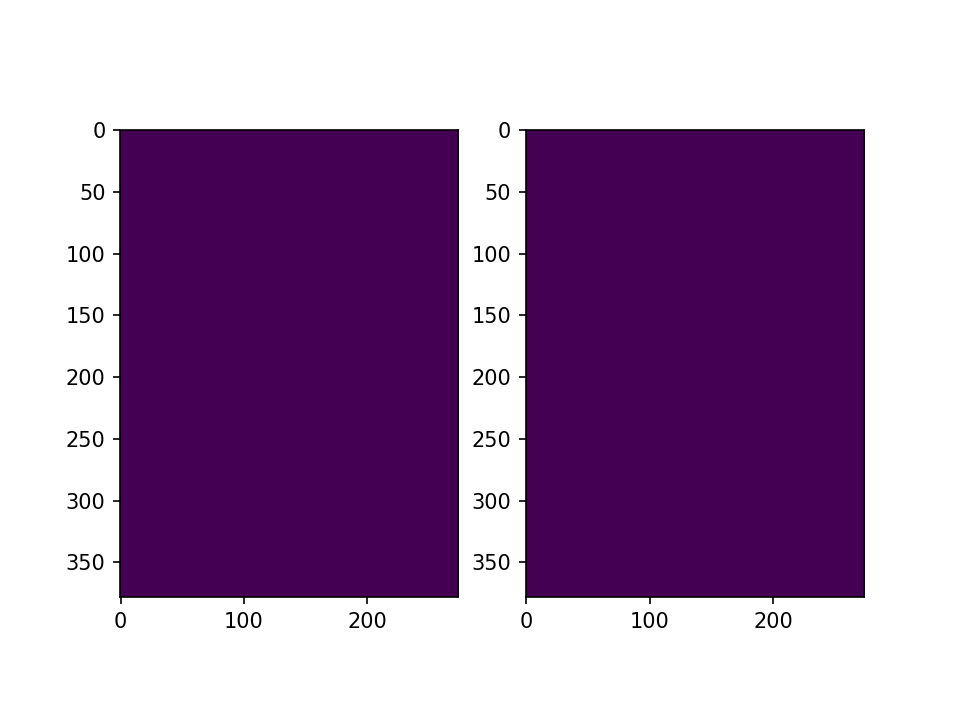

Finished loading slice 0 of 2112, time 17.890494108200073 s
Finished loading slice 1 of 2112, time 16.085498094558716 s
Finished loading slice 2 of 2112, time 16.00575613975525 s
Finished loading slice 3 of 2112, time 16.089317083358765 s
Finished loading slice 4 of 2112, time 15.982354402542114 s
Finished loading slice 5 of 2112, time 16.166702270507812 s
Finished loading slice 6 of 2112, time 16.185110330581665 s
Finished loading slice 7 of 2112, time 16.180492639541626 s
Finished loading slice 8 of 2112, time 16.183811902999878 s
Finished loading slice 9 of 2112, time 16.186265468597412 s
Finished loading slice 10 of 2112, time 16.171591758728027 s
Finished loading slice 11 of 2112, time 16.228867053985596 s
Finished loading slice 12 of 2112, time 16.17973017692566 s
Finished loading slice 13 of 2112, time 16.148848295211792 s
Finished loading slice 14 of 2112, time 16.104799509048462 s
Finished loading slice 15 of 2112, time 16.16773271560669 s
Finished loading slice 16 of 2112, ti

Finished loading slice 135 of 2112, time 17.687836408615112 s
Finished loading slice 136 of 2112, time 17.649972438812256 s
Finished loading slice 137 of 2112, time 17.674490451812744 s
Finished loading slice 138 of 2112, time 17.654484510421753 s
Finished loading slice 139 of 2112, time 17.63757586479187 s
Finished loading slice 140 of 2112, time 17.664001941680908 s
Finished loading slice 141 of 2112, time 17.637794256210327 s
Finished loading slice 142 of 2112, time 17.642025232315063 s
Finished loading slice 143 of 2112, time 17.671907424926758 s
Finished loading slice 144 of 2112, time 17.664029121398926 s
Finished loading slice 145 of 2112, time 17.671863555908203 s
Finished loading slice 146 of 2112, time 17.72081971168518 s
Finished loading slice 147 of 2112, time 17.65719699859619 s
Finished loading slice 148 of 2112, time 17.610703229904175 s
Finished loading slice 149 of 2112, time 17.645317554473877 s
Finished loading slice 150 of 2112, time 17.631134271621704 s
Finished lo

Finished loading slice 269 of 2112, time 18.951117753982544 s
Finished loading slice 270 of 2112, time 18.932667016983032 s
Finished loading slice 271 of 2112, time 18.955705165863037 s
Finished loading slice 272 of 2112, time 18.961820125579834 s
Finished loading slice 273 of 2112, time 18.91233730316162 s
Finished loading slice 274 of 2112, time 18.895634412765503 s
Finished loading slice 275 of 2112, time 18.962615728378296 s
Finished loading slice 276 of 2112, time 18.997109174728394 s
Finished loading slice 277 of 2112, time 19.04815673828125 s
Finished loading slice 278 of 2112, time 19.035053968429565 s
Finished loading slice 279 of 2112, time 18.886751890182495 s
Finished loading slice 280 of 2112, time 18.868115186691284 s
Finished loading slice 281 of 2112, time 18.892314434051514 s
Finished loading slice 282 of 2112, time 18.882121562957764 s
Finished loading slice 283 of 2112, time 18.87436604499817 s
Finished loading slice 284 of 2112, time 18.88391375541687 s
Finished loa

Finished loading slice 403 of 2112, time 20.163445949554443 s
Finished loading slice 404 of 2112, time 20.197186708450317 s
Finished loading slice 405 of 2112, time 20.190515756607056 s
Finished loading slice 406 of 2112, time 20.14955425262451 s
Finished loading slice 407 of 2112, time 20.079946279525757 s
Finished loading slice 408 of 2112, time 19.976176023483276 s
Finished loading slice 409 of 2112, time 19.97625994682312 s
Finished loading slice 410 of 2112, time 19.95037341117859 s
Finished loading slice 411 of 2112, time 19.977306365966797 s
Finished loading slice 412 of 2112, time 19.97163224220276 s
Finished loading slice 413 of 2112, time 19.955855131149292 s
Finished loading slice 414 of 2112, time 19.925769567489624 s
Finished loading slice 415 of 2112, time 19.929795503616333 s
Finished loading slice 416 of 2112, time 84.03296279907227 s
Finished loading slice 417 of 2112, time 20.323501110076904 s
Finished loading slice 418 of 2112, time 20.26893663406372 s
Finished loadi

Finished loading slice 536 of 2112, time 21.059452533721924 s
Finished loading slice 537 of 2112, time 21.091392993927002 s
Finished loading slice 538 of 2112, time 21.082151412963867 s
Finished loading slice 539 of 2112, time 21.0561580657959 s
Finished loading slice 540 of 2112, time 21.0241641998291 s
Finished loading slice 541 of 2112, time 21.114521741867065 s
Finished loading slice 542 of 2112, time 21.123026847839355 s
Finished loading slice 543 of 2112, time 21.128588676452637 s
Finished loading slice 544 of 2112, time 89.14491724967957 s
Finished loading slice 545 of 2112, time 21.32369041442871 s
Finished loading slice 546 of 2112, time 21.213212251663208 s
Finished loading slice 547 of 2112, time 21.214804649353027 s
Finished loading slice 548 of 2112, time 21.223498582839966 s
Finished loading slice 549 of 2112, time 21.276168823242188 s
Finished loading slice 550 of 2112, time 21.283819437026978 s
Finished loading slice 551 of 2112, time 21.260859966278076 s
Finished loadi

Finished loading slice 670 of 2112, time 21.611180543899536 s
Finished loading slice 671 of 2112, time 21.715686559677124 s
Finished loading slice 672 of 2112, time 91.63951301574707 s
Finished loading slice 673 of 2112, time 21.893420934677124 s
Finished loading slice 674 of 2112, time 21.78789710998535 s
Finished loading slice 675 of 2112, time 21.828425884246826 s
Finished loading slice 676 of 2112, time 21.827014923095703 s
Finished loading slice 677 of 2112, time 21.836694478988647 s
Finished loading slice 678 of 2112, time 21.84412121772766 s
Finished loading slice 679 of 2112, time 21.83524489402771 s
Finished loading slice 680 of 2112, time 21.78282380104065 s
Finished loading slice 681 of 2112, time 21.79529333114624 s
Finished loading slice 682 of 2112, time 21.815312147140503 s
Finished loading slice 683 of 2112, time 21.78135895729065 s
Finished loading slice 684 of 2112, time 21.815992832183838 s
Finished loading slice 685 of 2112, time 21.83680295944214 s
Finished loading

Finished loading slice 804 of 2112, time 22.504011869430542 s
Finished loading slice 805 of 2112, time 22.504223346710205 s
Finished loading slice 806 of 2112, time 22.54349136352539 s
Finished loading slice 807 of 2112, time 22.556522846221924 s
Finished loading slice 808 of 2112, time 22.54840636253357 s
Finished loading slice 809 of 2112, time 22.57582449913025 s
Finished loading slice 810 of 2112, time 22.556349277496338 s
Finished loading slice 811 of 2112, time 22.518065452575684 s
Finished loading slice 812 of 2112, time 22.688334465026855 s
Finished loading slice 813 of 2112, time 22.561980724334717 s
Finished loading slice 814 of 2112, time 22.547050952911377 s
Finished loading slice 815 of 2112, time 22.599238395690918 s
Finished loading slice 816 of 2112, time 22.558084964752197 s
Finished loading slice 817 of 2112, time 22.56059193611145 s
Finished loading slice 818 of 2112, time 22.54766583442688 s
Finished loading slice 819 of 2112, time 22.498188734054565 s
Finished load

Finished loading slice 938 of 2112, time 22.812692880630493 s
Finished loading slice 939 of 2112, time 22.80704927444458 s
Finished loading slice 940 of 2112, time 22.877498149871826 s
Finished loading slice 941 of 2112, time 22.86102056503296 s
Finished loading slice 942 of 2112, time 22.798572540283203 s
Finished loading slice 943 of 2112, time 22.87335515022278 s
Finished loading slice 944 of 2112, time 22.858973741531372 s
Finished loading slice 945 of 2112, time 22.865349292755127 s
Finished loading slice 946 of 2112, time 22.883349418640137 s
Finished loading slice 947 of 2112, time 22.907817602157593 s
Finished loading slice 948 of 2112, time 22.856547594070435 s
Finished loading slice 949 of 2112, time 22.790443420410156 s
Finished loading slice 950 of 2112, time 22.80349588394165 s
Finished loading slice 951 of 2112, time 22.864516973495483 s
Finished loading slice 952 of 2112, time 22.834514141082764 s
Finished loading slice 953 of 2112, time 22.85657572746277 s
Finished load

Finished loading slice 1070 of 2112, time 22.745748043060303 s
Finished loading slice 1071 of 2112, time 22.815705060958862 s
Finished loading slice 1072 of 2112, time 22.823997974395752 s
Finished loading slice 1073 of 2112, time 22.853793382644653 s
Finished loading slice 1074 of 2112, time 22.827951192855835 s
Finished loading slice 1075 of 2112, time 22.832645893096924 s
Finished loading slice 1076 of 2112, time 22.842419862747192 s
Finished loading slice 1077 of 2112, time 22.87311887741089 s
Finished loading slice 1078 of 2112, time 22.774033546447754 s
Finished loading slice 1079 of 2112, time 22.829787731170654 s
Finished loading slice 1080 of 2112, time 22.784974813461304 s
Finished loading slice 1081 of 2112, time 22.830475330352783 s
Finished loading slice 1082 of 2112, time 22.822033643722534 s
Finished loading slice 1083 of 2112, time 22.772817373275757 s
Finished loading slice 1084 of 2112, time 22.797157049179077 s
Finished loading slice 1085 of 2112, time 22.82826709747

Finished loading slice 1201 of 2112, time 22.822433710098267 s
Finished loading slice 1202 of 2112, time 22.745906352996826 s
Finished loading slice 1203 of 2112, time 22.690335273742676 s
Finished loading slice 1204 of 2112, time 22.617697715759277 s
Finished loading slice 1205 of 2112, time 22.79338240623474 s
Finished loading slice 1206 of 2112, time 22.791570901870728 s
Finished loading slice 1207 of 2112, time 22.702834129333496 s
Finished loading slice 1208 of 2112, time 22.6580970287323 s
Finished loading slice 1209 of 2112, time 22.68661403656006 s
Finished loading slice 1210 of 2112, time 22.774375438690186 s
Finished loading slice 1211 of 2112, time 22.824116706848145 s
Finished loading slice 1212 of 2112, time 22.801133632659912 s
Finished loading slice 1213 of 2112, time 22.80673384666443 s
Finished loading slice 1214 of 2112, time 22.7893545627594 s
Finished loading slice 1215 of 2112, time 22.77979302406311 s
Finished loading slice 1216 of 2112, time 95.60895657539368 s
F

Finished loading slice 1332 of 2112, time 22.55836796760559 s
Finished loading slice 1333 of 2112, time 22.552011013031006 s
Finished loading slice 1334 of 2112, time 22.594171285629272 s
Finished loading slice 1335 of 2112, time 22.627492666244507 s
Finished loading slice 1336 of 2112, time 22.621963024139404 s
Finished loading slice 1337 of 2112, time 22.631535530090332 s
Finished loading slice 1338 of 2112, time 22.60124373435974 s
Finished loading slice 1339 of 2112, time 22.657692432403564 s
Finished loading slice 1340 of 2112, time 22.60964608192444 s
Finished loading slice 1341 of 2112, time 22.583711624145508 s
Finished loading slice 1342 of 2112, time 22.62585711479187 s
Finished loading slice 1343 of 2112, time 22.64926815032959 s
Finished loading slice 1344 of 2112, time 93.09076428413391 s
Finished loading slice 1345 of 2112, time 22.543691873550415 s
Finished loading slice 1346 of 2112, time 22.48109793663025 s
Finished loading slice 1347 of 2112, time 22.5306339263916 s
F

Finished loading slice 1463 of 2112, time 22.457115411758423 s
Finished loading slice 1464 of 2112, time 22.383633613586426 s
Finished loading slice 1465 of 2112, time 22.266324520111084 s
Finished loading slice 1466 of 2112, time 22.200175285339355 s
Finished loading slice 1467 of 2112, time 22.239915370941162 s
Finished loading slice 1468 of 2112, time 22.233129739761353 s
Finished loading slice 1469 of 2112, time 22.235350131988525 s
Finished loading slice 1470 of 2112, time 22.24263620376587 s
Finished loading slice 1471 of 2112, time 22.238543272018433 s
Finished loading slice 1472 of 2112, time 89.65803074836731 s
Finished loading slice 1473 of 2112, time 22.14751696586609 s
Finished loading slice 1474 of 2112, time 22.064730644226074 s
Finished loading slice 1475 of 2112, time 22.115599155426025 s
Finished loading slice 1476 of 2112, time 22.099253177642822 s
Finished loading slice 1477 of 2112, time 22.093328952789307 s
Finished loading slice 1478 of 2112, time 22.0830190181732

Finished loading slice 1594 of 2112, time 21.392776250839233 s
Finished loading slice 1595 of 2112, time 21.432246208190918 s
Finished loading slice 1596 of 2112, time 21.365725994110107 s
Finished loading slice 1597 of 2112, time 21.353962421417236 s
Finished loading slice 1598 of 2112, time 21.37320613861084 s
Finished loading slice 1599 of 2112, time 21.36982274055481 s
Finished loading slice 1600 of 2112, time 88.6184720993042 s
Finished loading slice 1601 of 2112, time 21.071712732315063 s
Finished loading slice 1602 of 2112, time 21.056867837905884 s
Finished loading slice 1603 of 2112, time 21.059829711914062 s
Finished loading slice 1604 of 2112, time 21.040570735931396 s
Finished loading slice 1605 of 2112, time 21.051264762878418 s
Finished loading slice 1606 of 2112, time 21.026082038879395 s
Finished loading slice 1607 of 2112, time 21.079907178878784 s
Finished loading slice 1608 of 2112, time 21.020231246948242 s
Finished loading slice 1609 of 2112, time 21.06194806098938

Finished loading slice 1725 of 2112, time 20.023566722869873 s
Finished loading slice 1726 of 2112, time 20.022489547729492 s
Finished loading slice 1727 of 2112, time 19.82607674598694 s
Finished loading slice 1728 of 2112, time 78.66753196716309 s
Finished loading slice 1729 of 2112, time 19.50238871574402 s
Finished loading slice 1730 of 2112, time 19.458523511886597 s
Finished loading slice 1731 of 2112, time 19.440346479415894 s
Finished loading slice 1732 of 2112, time 19.455766677856445 s
Finished loading slice 1733 of 2112, time 19.482244968414307 s
Finished loading slice 1734 of 2112, time 19.454262495040894 s
Finished loading slice 1735 of 2112, time 19.45081639289856 s
Finished loading slice 1736 of 2112, time 19.427043914794922 s
Finished loading slice 1737 of 2112, time 19.377891063690186 s
Finished loading slice 1738 of 2112, time 19.332237482070923 s
Finished loading slice 1739 of 2112, time 19.40584373474121 s
Finished loading slice 1740 of 2112, time 19.357372045516968

Finished loading slice 1856 of 2112, time 71.74805569648743 s
Finished loading slice 1857 of 2112, time 17.643896102905273 s
Finished loading slice 1858 of 2112, time 17.581087350845337 s
Finished loading slice 1859 of 2112, time 17.710366249084473 s
Finished loading slice 1860 of 2112, time 17.65373182296753 s
Finished loading slice 1861 of 2112, time 17.65897011756897 s
Finished loading slice 1862 of 2112, time 17.625232219696045 s
Finished loading slice 1863 of 2112, time 17.641377449035645 s
Finished loading slice 1864 of 2112, time 17.64373254776001 s
Finished loading slice 1865 of 2112, time 17.62647843360901 s
Finished loading slice 1866 of 2112, time 17.633466720581055 s
Finished loading slice 1867 of 2112, time 17.613036632537842 s
Finished loading slice 1868 of 2112, time 17.62300181388855 s
Finished loading slice 1869 of 2112, time 17.618499279022217 s
Finished loading slice 1870 of 2112, time 17.620484828948975 s
Finished loading slice 1871 of 2112, time 17.67727303504944 s

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
# okay now I have to iterate over the dataset
# we need to save intermediate outputs (each slice) in case of errors
fig,ax = plt.subplots(1,2)
working = []
output = []
start = time.time()
for i in range(data.shape[0]):
    starti = time.time()
    outname = os.path.join(outdir,f'{i:04d}.npy')
    if os.path.exists(outname):
        sd = np.load(outname)
    else:
        s = data[i]
        sd = dw.downsample(s.astype(float),down[1:])
        np.save(outname,sd)
    
    ax[0].cla()
    ax[0].imshow(sd)
    working.append(sd)
    if len(working) == down[0]:
        out = dw.downsample(np.stack(working),[down[0],1,1])        
        ax[1].cla()
        ax[1].imshow(out[0])
        output.append(out)
        working = []
    fig.canvas.draw()
    print(f'Finished loading slice {i} of {data.shape[0]}, time {time.time() - starti} s')
output = np.concatenate(output)        
Id = output
print(f'Finished downsampling, time {time.time() - start}')

In [15]:
np.savez(output_filename,I=Id,xI=np.array(xId,dtype='object')) # note specify object to avoid "ragged" warning

<IPython.core.display.Javascript object>


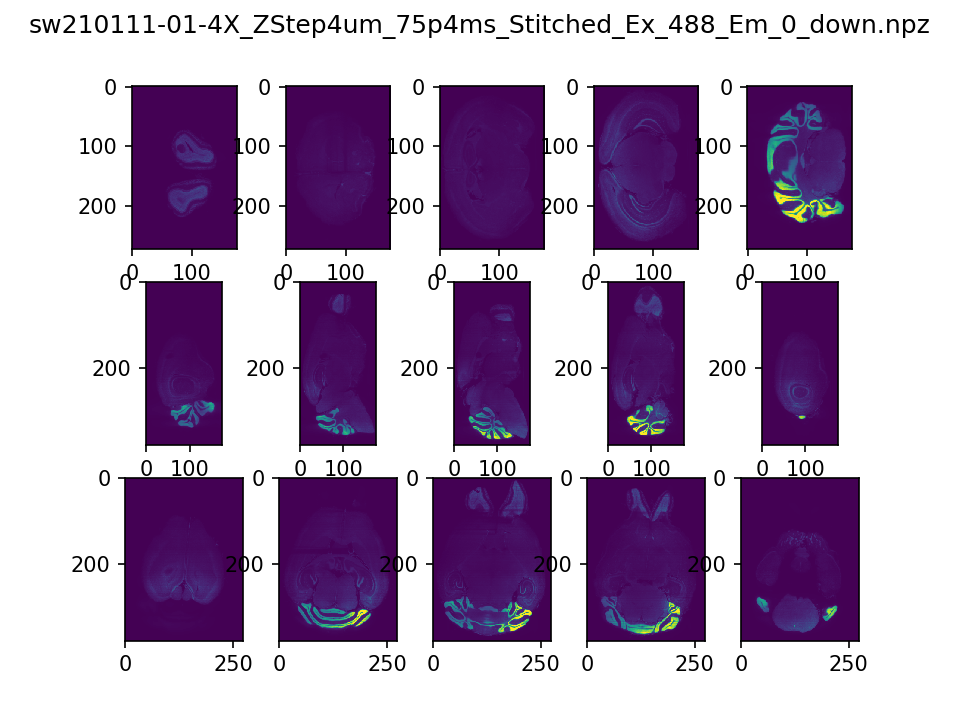

4294967296 4294967296


In [16]:
imp.reload(dw)
fig,ax = dw.draw_slices(Id)
fig.suptitle(output_filename)
fig.savefig(output_filename.replace('npz','jpg'))

In [17]:
f.close()

In [18]:
output_filename

'sw210111-01-4X_ZStep4um_75p4ms_Stitched_Ex_488_Em_0_down.npz'